# Haberman Dataset


## Information about the data set has been taken directly from Kaggle from the provided link in the assignment section

### The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

#### Number of Instances: 306

#### Number of Attributes: 4 (including the class attribute)

#### Attribute Information:

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
    1 = the patient survived 5 years or longer
    2 = the patient died within 5 year
5. Missing Attribute Values: None

### EDA has been performed as shown in IRIS Dataset



In [141]:
import pandas as pd          #importing necessary lib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("haberman.csv")  #Reading the csv file

In [4]:
df.head()       #printing the 5 data points from top

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
df.tail()     #printing the bottom 5 data points #This gives a view to the data 

,age,year,nodes,status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [6]:
df.shape    #Checking the no of rows and columns of the dataset

(306, 4)

In [7]:
df.columns  #checking the name of the columns of the dataset

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [8]:
df.info()   #checking the coloumns names, data type of each columns entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [9]:
print (df.isnull().sum())  #As stated in Kaggle there is no missing or null values but cross checking them

age       0
year      0
nodes     0
status    0
dtype: int64


In [12]:
df.status.value_counts() #As stated in the information Survival status (class attribute)
                            #1 = the patient survived 5 years or longer
                            #2 = the patient died within 5 year
                            #the value count function gives us the number of 1s an no of 2s in the status
                            #I can conclude that out out of 306 patients 225 survived 5 years or longer
                            #and 81 of the unfortunately died within 5 year

1    225
2     81
Name: status, dtype: int64

In [125]:
df.year.value_counts() #By this i can conclude that most operations were done in the year 1958 and least in 1969

58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: year, dtype: int64

## A count plot that can be thought of as a histogram 

[]

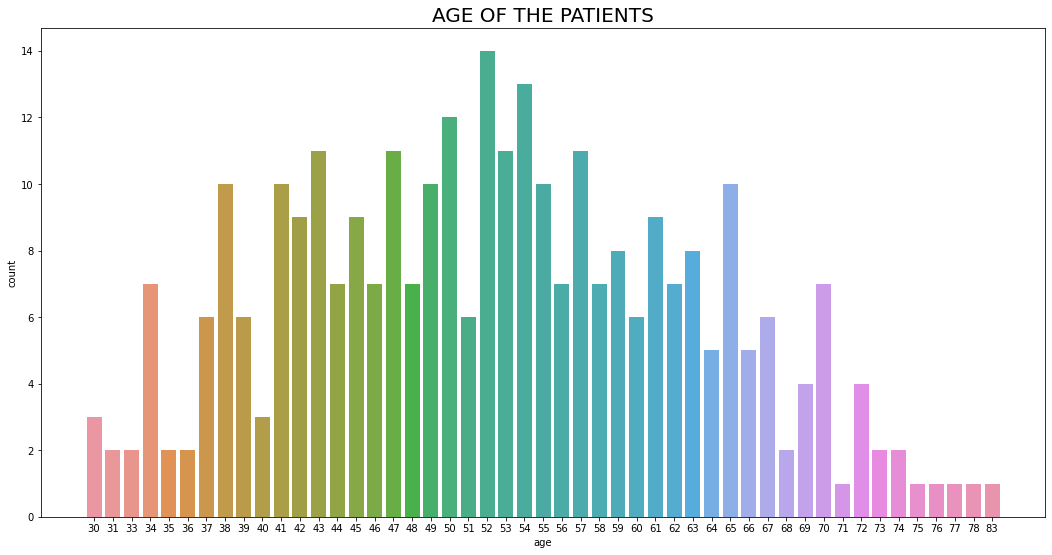

In [17]:
#Lets check the age of the paitents

plt.figure(figsize=(18,9))
sns.countplot(x='age',data=df)
plt.title("AGE OF THE PATIENTS",size=20)
plt.plot()


### Observation
1. We can see that age group of patients lies between 30 and 83
2. The most cancer patients are of age 52


# Scatter Plot

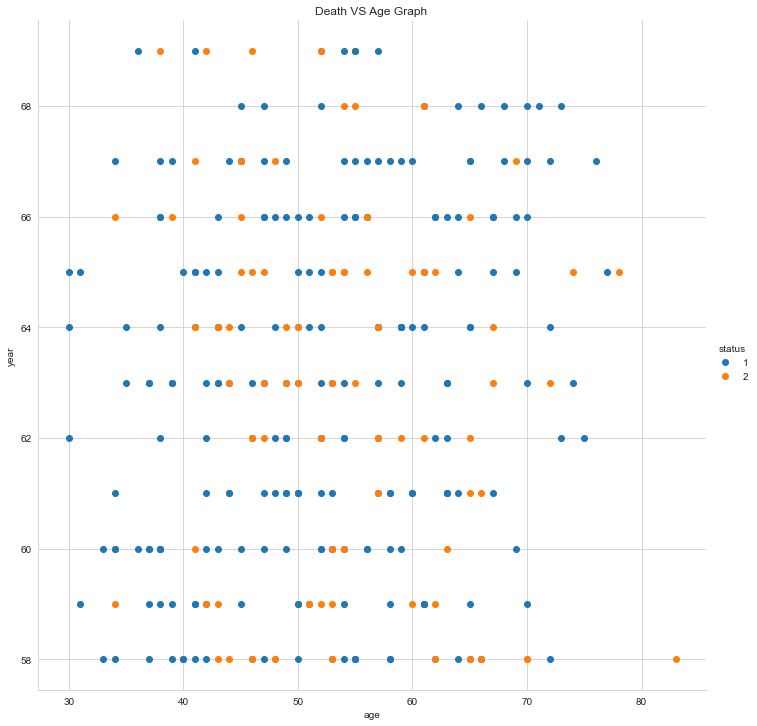

In [101]:
#Scatter Plot for Death Vs Age

sns.set_style('whitegrid')
sns.FacetGrid(df,hue='status',height=10)\
   .map(plt.scatter,'age','year')\
   .add_legend()
plt.title("Death VS Age Graph ")
plt.show()


### Observation
1. Between age group 64 and 66 most number of deaths occured

# Pair-plot

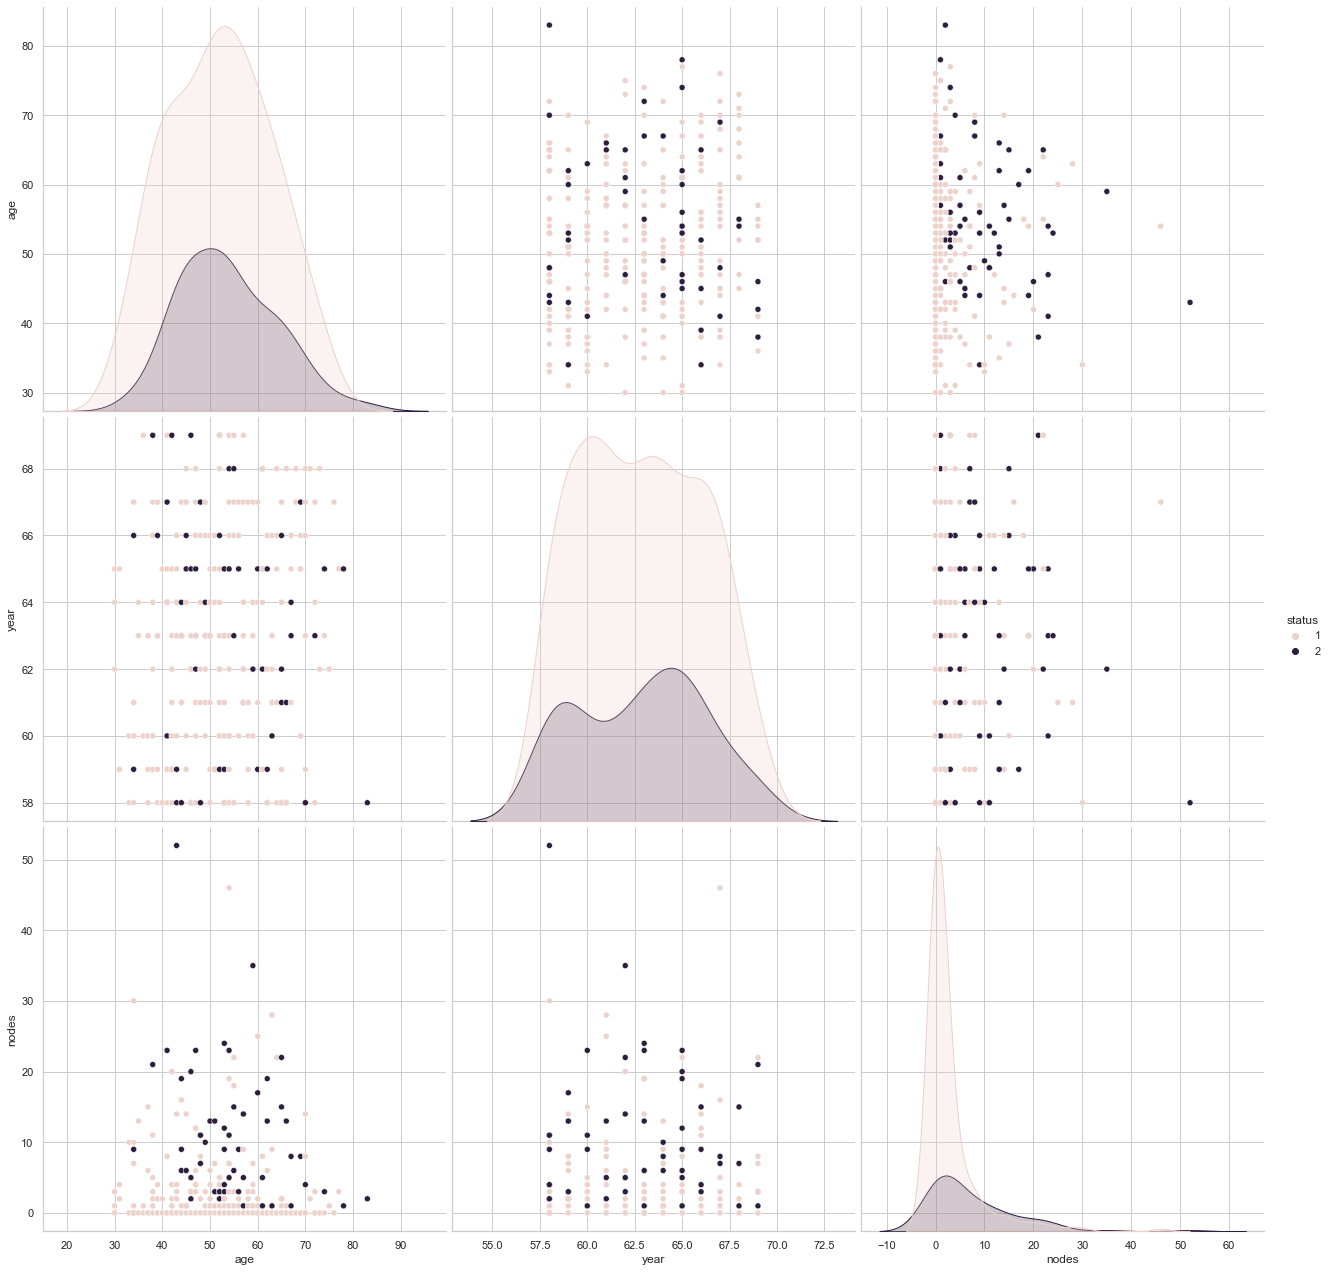

In [145]:
sns.set_style("whitegrid")
sns.pairplot(df,hue='status',height = 6)
plt.show()


### Observations
1. Women's who are of age greater then 67 had lost thier life in Operation year.(2nd row, 2nd column) 
2. If the axilliary nodes are greater then 9, I can say patient is almost safe according to the data.(3row,3column)


# PDF using DistPlot

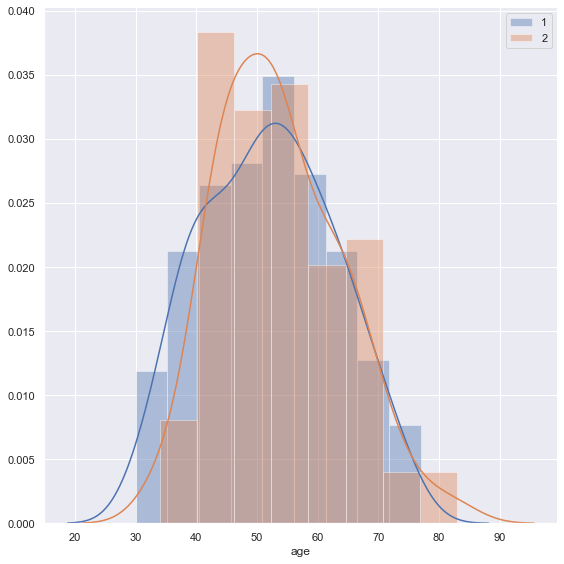

In [142]:
#Distriution plot for age and survival
#PDF of age using distplot

sns.FacetGrid(df, hue='status',height=8).map(sns.distplot,'age')
plt.legend()
plt.show()


### Obervation
1. People within 30-40 years of age have more chances of survival whereas people within 40-60 years of age have less chances of    survival. 
2. People within 65-75 years of age have equal chances of surviving and not surviving.
3. This pdf graph used to see the density of the survival rate.



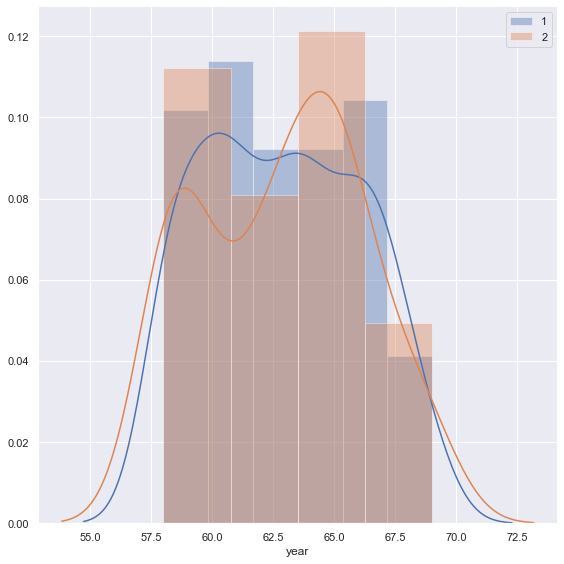

In [143]:
#PDF of Year of operation using distplot

sns.FacetGrid(df, hue='status',height=8).map(sns.distplot,'year')
plt.legend()
plt.show()

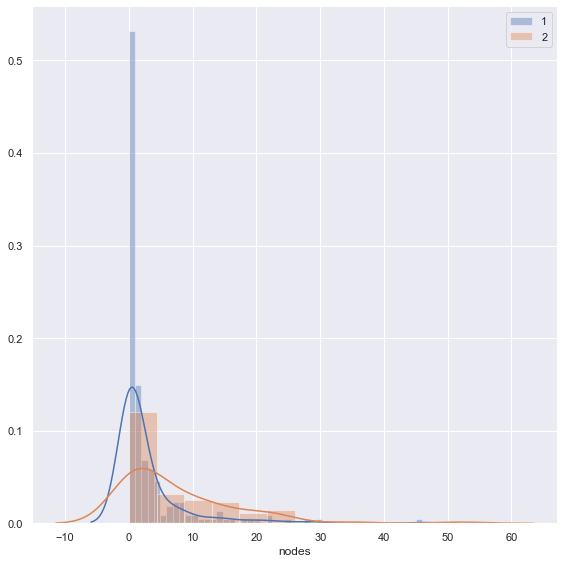

In [144]:
#PDF of Axillary nodes using distplot
sns.FacetGrid(df, hue='status',height=8).map(sns.distplot,'nodes')
plt.legend()
plt.show()


### Observation
1. Patients with no axillary nodes survived and patients with more than 2 axillary nodes have less chances of surviving.





In [56]:
pat_count = df.groupby(['status','age'])['year'].count().reset_index().rename(columns={'year':'Patient_count'})
pat_count.head()
                    #The number of Patients with age who survived or died

,status,age,Patient_count
0,1,30,3
1,1,31,2
2,1,33,2
3,1,34,5
4,1,35,2


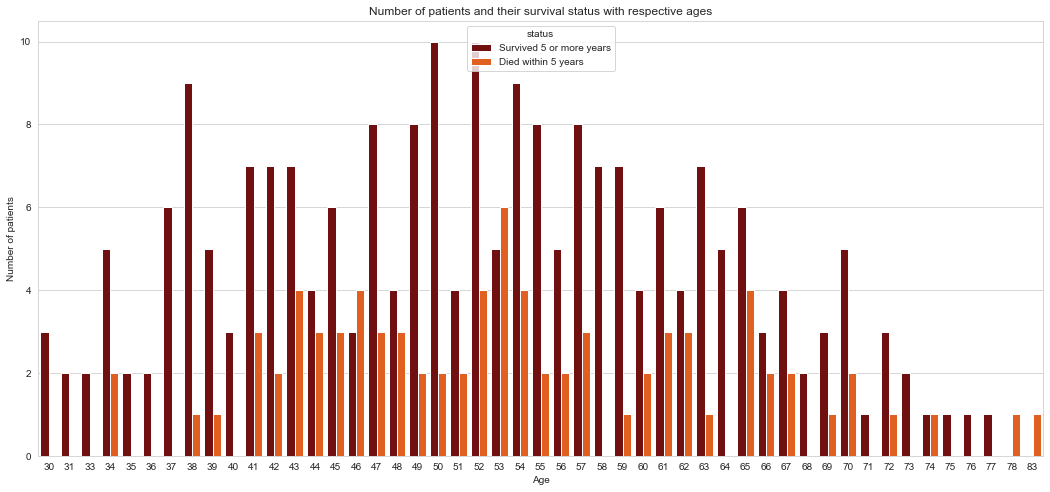

In [59]:
with plt.style.context('seaborn-bright'):   #This idea has been taken from kaggle beacuse i liked this idea very much
    fig,ax = plt.subplots(nrows=1,figsize=(18,8))
    sns.barplot(x='age',y='Patient_count',hue='status',data=pat_count,ax=ax,palette='gist_heat')
    ax.set_ylabel('Number of patients')
    ax.set_xlabel('Age')
    ax.set_title('Number of patients and their survival status with respective ages')
    
    leg = ax.get_legend()
    new_labels = ['Survived 5 or more years','Died within 5 years']
    for title, label in zip(leg.texts, new_labels): title.set_text(label)
    plt.show()


### Observation`
1. Fewer patients have expired within 5 years of treatment till 40 years of age.
2. The highest number of deaths within the 5 years have been observed for the age 53 
3. However, it can e observed that more number of patients have survived for 5 or more years across every age.

# Histogram, PDF, CDF

In [74]:
#creating dataframe of patients who survived
survived_df = df.loc[df["status"]== 1]

#creating dataframe of patients who died
died_df = df.loc[df["status"]== 2]


In [76]:
survived_df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [77]:
died_df.head()

,age,year,nodes,status
7,34,59,0,2
8,34,66,9,2
24,38,69,21,2
34,39,66,0,2
43,41,60,23,2


pdf_survived :
 [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
bin_edges_survived :
 [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
cdf_survived :
= [0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]
--------------------------------------------------------------------------------
pdf_died :
 [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
bin_edges_died:
 [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
cdf_died:
 = [0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]


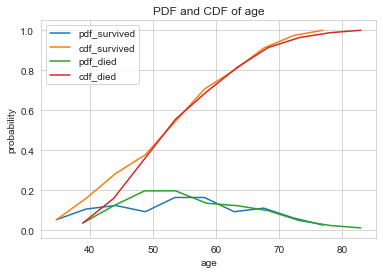

In [80]:
#Plotting PDF abd CDF for age of patients who survived

counts, bin_edges = np.histogram(survived_df['age'], bins=10, density = True)
pdf = counts/(sum(counts))
print("pdf_survived :\n",pdf);
print('bin_edges_survived :\n',bin_edges)
cdf = np.cumsum(pdf)
print("cdf_survived :\n=",cdf);
plt.plot(bin_edges[1:],pdf,label='pdf_survived')
plt.plot(bin_edges[1:],cdf,label='cdf_survived')

print('-'*80)

#Plotting PDF abd CDF for age of patients who died
counts, bin_edges = np.histogram(died_df['age'], bins=10, density = True)
pdf = counts/(sum(counts))
print("pdf_died :\n", pdf);
print('bin_edges_died:\n',bin_edges)
cdf = np.cumsum(pdf)
print("cdf_died:\n =",cdf);
plt.plot(bin_edges[1:],pdf, label='pdf_died')
plt.plot(bin_edges[1:], cdf, label='cdf_died')

plt.xlabel('age')
plt.ylabel('probability')
plt.title('PDF and CDF of age')
plt.legend()
plt.show()


### Observations:

#### PDF

1. Patients with the age between 45 and 55 have died more than people who survived.

#### CDF

1. Patient with age less than 45 has more probability of surviving than the probability of dying within 5 years

### Conclusion

1. No patients with the age between 30 and 34 have died within 5 years
2. No patients with the age between 77 and 83 have survived more than 5 years
3. But age not seems to be much useful in determining the patient as pdf and cdf plot of both classes are found to be              overlapped.



pdf_survived :
 [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
bin_edges_survived :
 [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
cdf_survived :
= [0.18666667 0.29333333 0.39555556 0.46666667 0.56444444 0.66666667
 0.73333333 0.83111111 0.92444444 1.        ]
................................................................................
pdf_died :
 [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
bin_edges_died:
 [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
cdf_died:
 = [0.25925926 0.30864198 0.34567901 0.43209877 0.5308642  0.62962963
 0.79012346 0.86419753 0.91358025 1.        ]


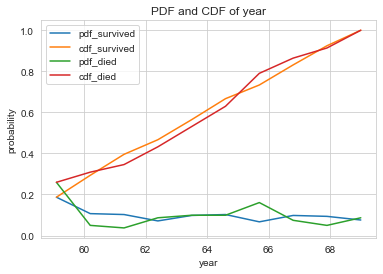

In [82]:
#Plotting PDF abd CDF for year of operation of patients who survived

counts, bin_edges = np.histogram(survived_df['year'], bins=10, density = True)
pdf = counts/(sum(counts))
print("pdf_survived :\n",pdf);
print('bin_edges_survived :\n',bin_edges)
cdf = np.cumsum(pdf)
print("cdf_survived :\n=",cdf);
plt.plot(bin_edges[1:],pdf,label='pdf_survived')
plt.plot(bin_edges[1:], cdf, label='cdf_survived')

print('.'*80)

#Plotting PDF abd CDF for year of operation of patients who died

counts, bin_edges = np.histogram(died_df['year'], bins=10, density = True)
pdf = counts/(sum(counts))
print("pdf_died :\n", pdf);
print('bin_edges_died:\n',bin_edges)
cdf = np.cumsum(pdf)
print("cdf_died:\n =",cdf);
plt.plot(bin_edges[1:],pdf, label='pdf_died')
plt.plot(bin_edges[1:], cdf, label='cdf_died')

plt.xlabel('year')
plt.ylabel('probability')
plt.title('PDF and CDF of year')
plt.legend()
plt.show()


### Observation

#### PDF

1. Patients who has been treated between 1960 and 1962 have survived more than people who died.
2. Patients who has been treated between 1965 and 1967 have died more than people who survived.

#### CDF

1. No valuable inference as it overlaps for both survival status.

#### Conclusion

2. Hence, from both pdf and cdf plot, year is also not seems to be useful in classifying the patient.



pdf_survived :
 [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
bin_edges_survived :
 [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
cdf_survived :
= [0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
pdf_died :
 [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
bin_edges_died:
 [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
cdf_died:
 = [0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


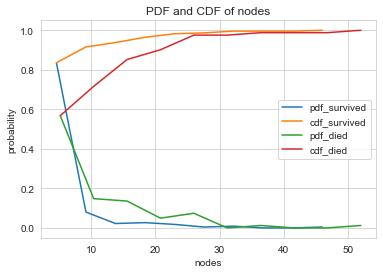

In [83]:
#Plotting PDF abd CDF for # of positive axillary nodes of patients who survived

counts, bin_edges = np.histogram(survived_df['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print("pdf_survived :\n",pdf);
print('bin_edges_survived :\n',bin_edges)
cdf = np.cumsum(pdf)
print("cdf_survived :\n=",cdf);
plt.plot(bin_edges[1:],pdf,label='pdf_survived')
plt.plot(bin_edges[1:], cdf, label='cdf_survived')

print('~'*60)

#Plotting PDF abd CDF for # of positive axillary nodes of patients who died

counts, bin_edges = np.histogram(died_df['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print("pdf_died :\n", pdf);
print('bin_edges_died:\n',bin_edges)
cdf = np.cumsum(pdf)
print("cdf_died:\n =",cdf);
plt.plot(bin_edges[1:],pdf, label='pdf_died')
plt.plot(bin_edges[1:], cdf, label='cdf_died')

plt.xlabel('nodes')
plt.ylabel('probability')
plt.title('PDF and CDF of nodes')
plt.legend()
plt.show()


### Observations

1. For the patients having less than 5 positive axillary nodes, the probability of surviving (~81%) is higher than the              probability of dying (~58%).
2.  No patients having more than 46 nodes have survived.

3. The PDF and CDF plot for 'nodes' of both srvival status are also overlapping, but it clearly shows that the patients with        less number of postive axillary nodes have more chances of survival.

4. I can oserve that from all PDF and CDF plot, nodes seems to be much useful in classifying the patient's survival status than    other features.



# Mean, Std-Dev, Median, Percentile, Quantile, IQR, MAD

In [110]:
print("Means:")
print("Mean age of the people that survived: ", np.mean(survived_df["age"]))
print("Mean age of the people that could not survive : ", np.mean(died_df["age"]))
print("Mean Positive lymph nodes in the people that survived : ", np.mean(survived_df["nodes"]))
print("Mean Positive lymph nodes in the people that could not survived : ", np.mean(died_df["nodes"]))
print("-"*80)

print("\nStd-dev:");
print("Std-Dev of age of the people that survived: ", np.std(survived_df["age"]))
print("Std-Dev of age of the people that could not survived: ", np.std(died_df["age"]))
print("Std-Dev of Positive lymph nodes in the people that survived : ", np.std(survived_df["nodes"]))
print("Std-Dev of Positive lymph nodes in the people that could not survived : ", np.std(died_df["nodes"]))
print("-"*80)



print("Medians :")
print("Median age of the people that survived : ",np.median(survived_df["age"]))
print("Median age of the people that could not survive : ", np.median(died_df["age"]))
print("Median Positive lymph nodes in the people that survived : ", np.median(survived_df["nodes"]))
print("Median Positive lymph nodes in the people that could not survive :  ", np.median(died_df["nodes"]))
print("-"*80)

print("Quantiles :")
print("Survived : ")
print("AGE :",np.percentile(survived_df["age"], np.arange(0, 100, 25)))
print("NODES : ", np.percentile(survived_df["nodes"], np.arange(0,100,25)))
print("Death : ")
print("AGE :",np.percentile(died_df["age"], np.arange(0, 100, 25)))
print("NODES : ", np.percentile(died_df["nodes"], np.arange(0,100,25)))
print("-"*80)

print("Percentiles : ")
print("Survived : ")
print("AGE :",np.percentile(survived_df["age"], 40))
print("NODES : ", np.percentile(survived_df["nodes"], 40))
print("Death : ")
print("AGE :",np.percentile(died_df["age"], 40))
print("NODES : ", np.percentile(died_df["nodes"], 40))
print("-"*80)

from statsmodels import robust
print("Median Abolute Deviation : ")
print("Survived :")
print("AGE :",robust.mad(survived_df["age"]))
print("NODES :",robust.mad(survived_df["nodes"]))
print("Death :")
print("AGE :",robust.mad(died_df["age"]))
print("NODES :",robust.mad(died_df["nodes"]))


Means:
Mean age of the people that survived:  52.01777777777778
Mean age of the people that could not survive :  53.67901234567901
Mean Positive lymph nodes in the people that survived :  2.7911111111111113
Mean Positive lymph nodes in the people that could not survived :  7.45679012345679
--------------------------------------------------------------------------------

Std-dev:
Std-Dev of age of the people that survived:  10.98765547510051
Std-Dev of age of the people that could not survived:  10.10418219303131
Std-Dev of Positive lymph nodes in the people that survived :  5.857258449412131
Std-Dev of Positive lymph nodes in the people that could not survived :  9.128776076761632
--------------------------------------------------------------------------------
Medians :
Median age of the people that survived :  52.0
Median age of the people that could not survive :  53.0
Median Positive lymph nodes in the people that survived :  0.0
Median Positive lymph nodes in the people that could 

#  Box plot and Whiskers

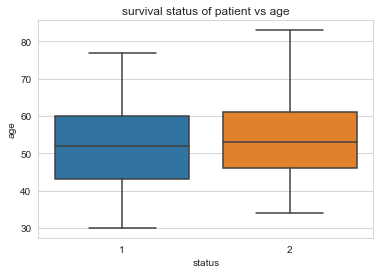

In [85]:
#Boxplot for survival status of patient vs age 

sns.boxplot(x='status',y='age', data=df)
plt.title('survival status of patient vs age')
plt.show()


### Observations

1. 50% of patient's age who survived more than 5 years are ranges from 43 to 60 (IQR)
2. 50% of patient's age who died within 5 years are ranges from 46 to 61 (IQR)



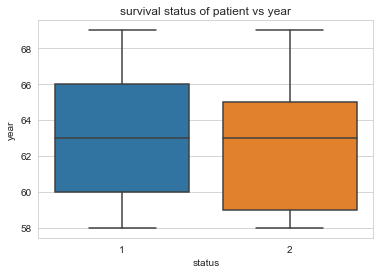

In [87]:
#Boxplot for survival status of patient vs year

sns.boxplot(x='status',y='year', data=df)
plt.title('survival status of patient vs year')
plt.show()


### Observations
1. 50% operations happened in between 1959 to 1965 for patients who died within 5 years (IQR)
2. 50% operations happened in between 1960 to 1966 for patients who survived more than 5 years (IQR)


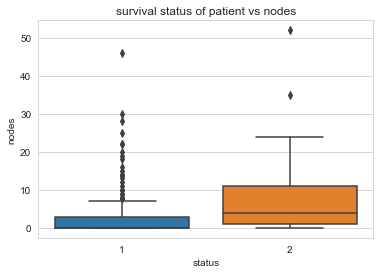

In [91]:
#Boxplot for survival status of patient vs nodes

sns.boxplot(x='status',y='nodes', data=df)
plt.title('survival status of patient vs nodes')
plt.show()


### Observations

1. 50% of patients who survived more than 5 years are having 0 positive axillary nodes(median)
2. 50% of patients who died within 5 years are having the positive axillary nodes within the range of 1 to 11(IQR)
3. Patients who survived more than 5 years having their positive nodes less than 7(max). We see some outliers above the            whiskers.


# Violin Plot

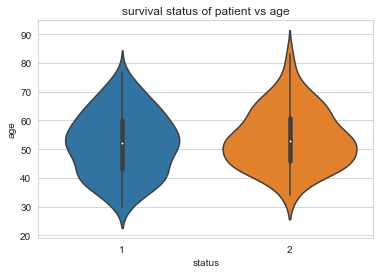

In [92]:
#violin plot for survival status of patient vs age 

sns.violinplot(x="status", y="age", data=df, size=10)
plt.title('survival status of patient vs age')
plt.show()


### Observations:

1. Age of patients who died within 5 years is highly populated between 45 and 55


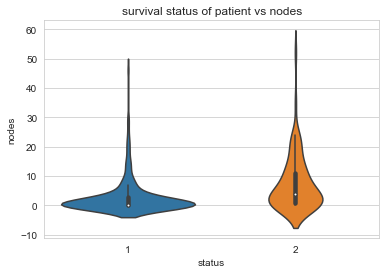

In [95]:
#violin plot for survival status of patient vs nodes

sns.violinplot(x="status", y="nodes", data=df, size=10)
plt.title('survival status of patient vs nodes')
plt.show()


### Observations

1. Positive axillary nodes of patients who survived more than 5 years is highly densed for 0 to 2 nodes.
2. Positive axillary nodes of patients who died within 5 years is highly densed for 4 to 7 nodes.



# Countor Plots

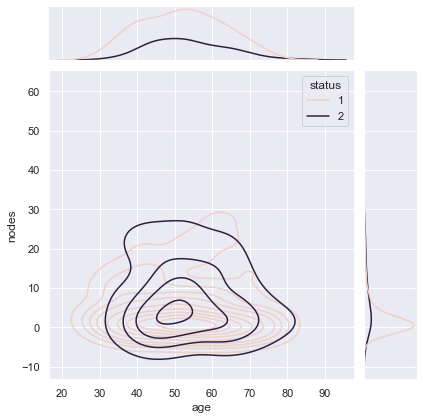

In [137]:
sns.jointplot(x="age", y="nodes", data=df, kind="kde",hue="status");
plt.show()


# Conclusion

1. Haberman dataset is a imbalanced dataset, as the number of data points for the 2 classes are not equal.

2. I plotted multiple plots above to classify a new patient as belonging to one of the 2 classes based on the 3 features.

### Age
   if age > 30 && age < 34, then survived more than 5 
   if age >77, then died within 5 years 

### Year of operation
     'year' does not convey any valuable inference as it overlaps for both survival status.

### Nodes
1. from all the plots,'nodes' gives us a clear idea that the patients having less number of positive axilary nodes have            survived more than 5 years after the operation.
2. if number of axillary node is less,than survival of patients is more

### It is possible to assume that as the number of nodes and age increases, the chance of survival of patients    decreases.


